In [ ]:
import numpy as np 
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['fake_101.csv']))

Saving fake_101.csv to fake_101.csv


In [ ]:
df.head()

,id,title,text,subcategory,label,Unnamed: 5
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,NaN
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,TRUE,1,NaN
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,TRUE,1,NaN
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,NaN
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,NaN


In [ ]:
df = df.fillna("Not Listed")

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords 
nltk.download('stopwords')
df['Text'] = df[['title', 'text']].apply(lambda x: ' '.join(x), axis = 1)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    review = review.lower()
    review = review.split()
    
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
y = df.iloc[: , 4]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase = True , analyzer = 'word' , stop_words = 'english')

In [ ]:
X = tfidf.fit_transform(corpus)
a = X[0].toarray()
a

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(3122, 35721)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 0.4)

In [ ]:
y

0       0
1       1
2       1
3       0
4       0
       ..
3117    1
3118    1
3119    1
3120    0
3121    0
Name: label, Length: 3122, dtype: object

In [ ]:
param_grid = {"alpha": [0.01, 0.02,1,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)


In [ ]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ......................................

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END .........................................alpha=0.03; total time=   0.0s
[CV] END .........................................alpha=0.03; total time=   0.0s
[CV] END .........................................alpha=0.03; total time=   0.0s
[CV] END .........................................alpha=0.03; total time=   0.0s
[CV] END .........................................alpha=0.03; total time=   0.0s
[CV] END .........................................alpha=0.04; total time=   0.0s
[CV] END .........................................alpha=0.04; total time=   0.0s
[CV] END .........................................alpha=0.04; total time=   0.0s
[CV] END .........................................alpha=0.04; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.02, 1, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1]},
             verbose=2)

In [ ]:
grid_search.best_params_


{'alpha': 0.04}


In [ ]:
grid_search.best_score_


0.811048839071257


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha = 0.04)
mnb.fit(X_train , y_train)

MultinomialNB(alpha=0.04)

In [ ]:
y_pred = mnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score
cm = confusion_matrix(y_test , y_pred)
acc = accuracy_score(y_test , y_pred)
f11=f1_score(y_test,y_pred, average='micro')
acc*100

81.1048839071257

In [ ]:
f11

0.811048839071257

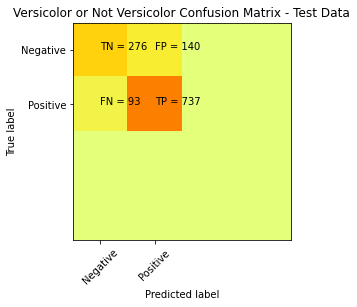

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB(alpha = 0)
mnb1.fit(X_train , y_train)
y_pred = mnb1.predict(X_test)
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score
cm1 = confusion_matrix(y_test , y_pred)
acc1 = accuracy_score(y_test , y_pred)
acc1 *100

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


77.18174539631705

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB(alpha = 1)
mnb2.fit(X_train , y_train)
y_pred = mnb2.predict(X_test)
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score
cm2 = confusion_matrix(y_test , y_pred)
acc2 = accuracy_score(y_test , y_pred)
acc2 *100

67.41393114491594

In [ ]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(X_test)  

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score
cm4= confusion_matrix(y_test , y_pred)
acc4 = accuracy_score(y_test , y_pred)
acc4 *100

81.02481985588472

In [ ]:
f12= f1_score(y_test,y_pred, average='micro')
f12

0.8102481985588471

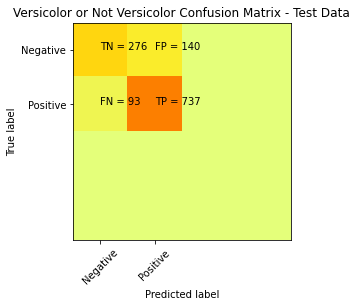

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()
plt.imshow(cm4, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s1 = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(random_state=0)

In [ ]:
y_pred1= classifier.predict(X_test)  

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score
cm5= confusion_matrix(y_test , y_pred1)
acc5 = accuracy_score(y_test , y_p2red1)
acc5 *100

81.42514011208966

In [ ]:
from sklearn.svm import SVC 
classifier = SVC(kernel='poly', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred2= classifier.predict(X_test)  

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score
cm6= confusion_matrix(y_test , y_pred2)
acc6 = accuracy_score(y_test , y_pred2)
acc6 *100

68.77502001601282

In [ ]:
X1=['Active Covid Cases in Country Decline to 96506']

In [ ]:
vec_X1 = tfidf.transform(X1)

In [ ]:
mnb.predict(vec_X1)

array(['1'], dtype='<U10')

In [ ]:
classifier.predict(vec_X1)

array(['1'], dtype=object)